# Project 1: Transaction Success Prediction



This project looks at transaction data. One very important subset of performing data science on transaction data consists of binary classification problems such as: is a customer satisfied? Will a customer buy this product? Can a customer pay this loan?

In this project, we want to predict whether or not a future customer will make a transaction based on their transaction data.

The data provided has the same structure as real data typically available to solve this problem. The columns of the input variables have been anonymized, so there is no intuition available to help judge which variables might be more important, so all variables need to be considered equally.

The project should be done using the Gaussian Naive Bayes classification techniques as covered in class. In this directory is included a recommended "To Do" list for the
project.

The data is available on AWS S3 at https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.csv


## Problem Definition

The goal is to determine if a customer will make a transaction based on a supervised set of data, whether or not the customer is satisfied and if the customer can pay the loan.

##Data Collection/Sources

###Data Overview

###Imports

In [1]:
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

from sklearn import datasets, metrics, model_selection
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

###File Paths

In [2]:
base_path =  'https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/'
train_path = base_path + 'Transaction.train.csv'
test_path = base_path + 'Transaction.test.csv'

###Load Data

In [3]:
train_orig = pd.read_csv(train_path)
train_orig.head()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,train_0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,1,train_1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,2,train_2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,3,train_3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,4,train_4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


In [4]:
train_orig.shape

(180000, 53)

##Data Cleaning

Next we'll look at the last few rows of the data just to double check that everything looks good.

In [5]:
train_orig.tail()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
179995,179995,train_179995,0,8.9112,-4.4900,11.3795,5.4164,8.3309,14.1869,12.8219,...,5.9355,5.1764,-5.4817,20.7390,-0.8043,31.3663,8.7194,4.7839,0.9673,14.9529
179996,179996,train_179996,0,8.2722,7.1923,16.7300,4.9698,5.4907,14.0238,11.9933,...,5.3550,-1.5556,7.3839,9.9193,5.0860,28.0185,7.4145,4.2814,2.5575,15.3969
179997,179997,train_179997,0,12.4902,-2.9379,6.5901,4.7242,9.1423,13.9133,12.2314,...,6.0708,-0.3463,-5.0098,20.4807,5.9814,20.2668,3.1006,3.7701,0.1299,16.1256
179998,179998,train_179998,0,8.4894,0.7048,11.1518,4.6370,8.1321,14.2921,6.9582,...,5.5161,3.1774,-4.9374,23.6365,1.0432,29.9365,9.6381,6.9649,2.5546,15.6760
179999,179999,train_179999,0,11.6252,3.3959,11.5558,4.2003,7.4666,13.7381,12.9590,...,5.0415,-2.4210,-3.6829,14.2422,1.0741,26.3943,4.1482,11.9539,2.9846,15.6002


###Drop Columns

First, we'll drop a couple of columns that don't look useful.
... is just a column with "..." This won't help our model so we'll drop this column.

In [6]:
train = train_orig.copy()
train.head()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,train_0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,1,train_1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,2,train_2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,3,train_3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,4,train_4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


In [7]:
train.drop('ID_code', axis=1, inplace=True)
train.drop('Unnamed: 0', axis=1, inplace=True)
column_labels = ', '.join([col for col in train.columns])
column_labels


'target, var_0, var_1, var_2, var_3, var_4, var_5, var_6, var_7, var_8, var_9, var_10, var_11, var_12, var_13, var_14, var_15, var_16, var_17, var_18, var_19, var_20, var_21, var_22, var_23, var_24, var_25, var_26, var_27, var_28, var_29, var_30, var_31, var_32, var_33, var_34, var_35, var_36, var_37, var_38, var_39, var_40, var_41, var_42, var_43, var_44, var_45, var_46, var_47, var_48, var_49'

In [8]:
train

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,4.2840,16.2191,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,7.8000,2.7407,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,4.7011,18.1377,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,15.9426,12.5579,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,6.5263,18.9608,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,0,8.9112,-4.4900,11.3795,5.4164,8.3309,14.1869,12.8219,22.3368,11.4176,...,5.9355,5.1764,-5.4817,20.7390,-0.8043,31.3663,8.7194,4.7839,0.9673,14.9529
179996,0,8.2722,7.1923,16.7300,4.9698,5.4907,14.0238,11.9933,16.0279,15.7685,...,5.3550,-1.5556,7.3839,9.9193,5.0860,28.0185,7.4145,4.2814,2.5575,15.3969
179997,0,12.4902,-2.9379,6.5901,4.7242,9.1423,13.9133,12.2314,15.2717,7.7995,...,6.0708,-0.3463,-5.0098,20.4807,5.9814,20.2668,3.1006,3.7701,0.1299,16.1256
179998,0,8.4894,0.7048,11.1518,4.6370,8.1321,14.2921,6.9582,20.4504,29.9869,...,5.5161,3.1774,-4.9374,23.6365,1.0432,29.9365,9.6381,6.9649,2.5546,15.6760


Next, I shuffled to be able to display that we have both zeros and ones as part of our target df

In [9]:
#n_samples = 5
#samples_per_class = train.groupby('target').head(n_samples)
#samples_per_class


n_samples = 2
df_shuffled = train.sample(frac=1).reset_index(drop=True)
# Group by the target column and take `n_samples` from each group
samples_per_class = df_shuffled.groupby('target').head(n_samples)
samples_per_class

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,17.8290,-7.4259,11.3328,6.4354,8.8882,14.3139,7.2388,15.8119,6.8756,...,5.4842,-3.8507,8.2645,9.1926,1.4609,25.0578,-0.5434,3.3124,2.5045,12.0544
1,0,16.5620,-5.2057,8.2989,4.3443,6.3598,14.3405,9.5626,27.6767,15.3983,...,6.1359,4.1495,-6.9532,28.4790,1.4927,13.2951,8.2894,3.0543,2.9848,15.8746
3,1,14.8382,-1.7280,9.2161,5.9387,5.0104,13.7224,10.8139,25.1453,3.4877,...,5.9066,-4.9194,8.6123,19.8758,4.5234,32.7809,-1.8847,9.4675,2.2031,18.3037
17,1,6.4556,6.7934,13.1078,5.8081,8.7296,13.9248,-1.6414,26.8122,7.9223,...,5.3242,-3.6344,-0.2022,15.3457,7.5818,15.7342,-3.1718,8.2390,1.6502,9.0542


Here we are just getting the first 5 observations of the train df

In [10]:
train.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,4.2840,16.2191,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,7.8000,2.7407,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,4.7011,18.1377,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,15.9426,12.5579,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,6.5263,18.9608,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


The first 5 observations were used to determine if the data is what we are looking for. We want to make sure that the data still looks organized and the columns are what we need.

Next, we want to se if there are nay unique values in order to either drop or leave some of the columns

In [11]:
train['var_0'].unique()

array([ 8.9255, 11.5006,  8.6093, ...,  6.0419,  6.145 , 15.7964])

By looking at the unique var we can see that they might be helpful so leave columns.

###Check for null values

We want to check if there are any null values in any of the observations so we can determine if they are negligable and how to deal with them. We have 2 options if there are null values. One is to impude the data or to just drop the oberservation.

In [12]:
train.isna()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
179996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
179997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
179998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It appears that there are no Null values but we will need to triple check to ensure by using the .sum() method.

In [13]:
train.isna().sum().sum()

0

0 null values are returned.

we want to see train.info() to see if we have all observations with non-null values.

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   target  180000 non-null  int64  
 1   var_0   180000 non-null  float64
 2   var_1   180000 non-null  float64
 3   var_2   180000 non-null  float64
 4   var_3   180000 non-null  float64
 5   var_4   180000 non-null  float64
 6   var_5   180000 non-null  float64
 7   var_6   180000 non-null  float64
 8   var_7   180000 non-null  float64
 9   var_8   180000 non-null  float64
 10  var_9   180000 non-null  float64
 11  var_10  180000 non-null  float64
 12  var_11  180000 non-null  float64
 13  var_12  180000 non-null  float64
 14  var_13  180000 non-null  float64
 15  var_14  180000 non-null  float64
 16  var_15  180000 non-null  float64
 17  var_16  180000 non-null  float64
 18  var_17  180000 non-null  float64
 19  var_18  180000 non-null  float64
 20  var_19  180000 non-null  float64
 21  var_20  18

In [15]:
sums = train.isna().sum()

We can also use the sums > 0 to validate that each "var" is equal to False. This will show that there are no null values for each "var"

In [16]:
sums > 0

target    False
var_0     False
var_1     False
var_2     False
var_3     False
var_4     False
var_5     False
var_6     False
var_7     False
var_8     False
var_9     False
var_10    False
var_11    False
var_12    False
var_13    False
var_14    False
var_15    False
var_16    False
var_17    False
var_18    False
var_19    False
var_20    False
var_21    False
var_22    False
var_23    False
var_24    False
var_25    False
var_26    False
var_27    False
var_28    False
var_29    False
var_30    False
var_31    False
var_32    False
var_33    False
var_34    False
var_35    False
var_36    False
var_37    False
var_38    False
var_39    False
var_40    False
var_41    False
var_42    False
var_43    False
var_44    False
var_45    False
var_46    False
var_47    False
var_48    False
var_49    False
dtype: bool

In [17]:
sums[sums >0]

Series([], dtype: int64)

###Check target values

Since we have a target value on whether or not someome made a purchase we can check to make sure that all of these values are valid, and also to check if the data is balanced or not.

In [18]:
train['target'].value_counts()

target
0    161960
1     18040
Name: count, dtype: int64

We can see that the non purchase observations are significatly larger than the purchase oberservations. The zero is the non purchase and the one is the purchase observation. We have an unbalanced dataset. We will need to address this by balancing the dataset.

In [19]:
train.shape

(180000, 51)

We verfied that the shape of the df we are working on is correct being that we dropped 2 column and still show that we have all 180,000 observations to work with.

##Exploratory Data Analysis

###Feature Correlation

Let's just take a quick visual look at what our feature correlations are. Since we are using variables that have no true meaning we will just run a heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

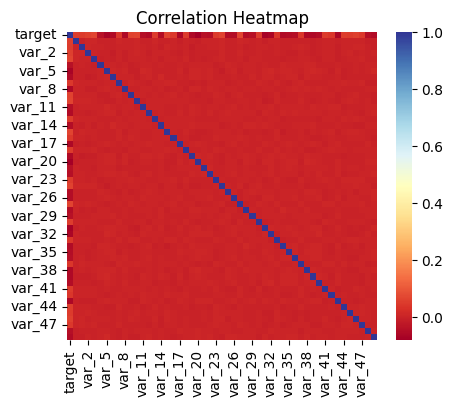

In [20]:
corr = train.corr()
plt.figure(figsize=(5,4))
sns.heatmap(corr, cmap='RdYlBu',annot = False);
plt.title('Correlation Heatmap')

We don't see much of a correlation with a heat map so further analysis is necessary. When looking specifically at the features that correlate nothing is evident. We'll look specifically at the values for these.

In [21]:
corr_unstacked = corr.unstack()
corr_unstacked

target  target    1.000000
        var_0     0.052904
        var_1     0.049916
        var_2     0.055450
        var_3     0.066924
                    ...   
var_49  var_45   -0.003859
        var_46   -0.001607
        var_47   -0.000892
        var_48    0.003141
        var_49    1.000000
Length: 2601, dtype: float64

In [22]:
corr_unstacked_not_self = corr_unstacked[ corr_unstacked !=1 ]
corr_unstacked_not_self

target  var_0     0.052904
        var_1     0.049916
        var_2     0.055450
        var_3     0.066924
        var_4    -0.042073
                    ...   
var_49  var_44    0.000081
        var_45   -0.003859
        var_46   -0.001607
        var_47   -0.000892
        var_48    0.003141
Length: 2550, dtype: float64

In [23]:
# Because negative correlation could also be of interest, we will take the absolute value, `abs()`.
corr_unstacked_not_self['target'].abs().sort_values(ascending = False)

var_20    0.080689
var_31    0.073296
var_5     0.070015
var_3     0.066924
var_27    0.064868
var_32    0.063871
var_10    0.063565
var_15    0.062887
var_43    0.061291
var_17    0.059906
var_24    0.059306
var_9     0.059227
var_8     0.057378
var_39    0.057373
var_19    0.057320
var_46    0.056902
var_38    0.055704
var_2     0.055450
var_6     0.054375
var_34    0.053733
var_0     0.052904
var_30    0.052457
var_12    0.052324
var_49    0.051718
var_44    0.051110
var_26    0.050278
var_40    0.050049
var_1     0.049916
var_28    0.049551
var_13    0.049072
var_14    0.048623
var_18    0.048392
var_35    0.048198
var_41    0.047948
var_23    0.047569
var_45    0.047543
var_25    0.047005
var_22    0.046433
var_11    0.045516
var_36    0.045513
var_47    0.045506
var_16    0.045281
var_7     0.044769
var_48    0.042765
var_4     0.042073
var_29    0.041987
var_42    0.041593
var_33    0.040520
var_21    0.040311
var_37    0.040147
dtype: float64

Next, let's look at which pairs of features are most correlated. Because negative correlation could also be of interest, we will take the absolute value, abs().

In [24]:
corr_pair = corr_unstacked_not_self.abs().sort_values(kind='quicksort', ascending = False)
corr_pair

target  var_20    0.080689
var_20  target    0.080689
var_31  target    0.073296
target  var_31    0.073296
        var_5     0.070015
                    ...   
var_43  var_18    0.000019
var_39  var_41    0.000018
var_41  var_39    0.000018
var_45  var_48    0.000009
var_48  var_45    0.000009
Length: 2550, dtype: float64

In [25]:
corr_pair[::2].head(20)

target  var_20    0.080689
var_31  target    0.073296
target  var_5     0.070015
var_3   target    0.066924
var_27  target    0.064868
var_32  target    0.063871
target  var_10    0.063565
var_15  target    0.062887
target  var_43    0.061291
        var_17    0.059906
var_24  target    0.059306
target  var_9     0.059227
        var_8     0.057378
var_39  target    0.057373
var_19  target    0.057320
target  var_46    0.056902
var_38  target    0.055704
var_2   target    0.055450
target  var_6     0.054375
var_34  target    0.053733
dtype: float64

we see that var_20 semi correlates to the target

In [26]:
# An alternative method for finding the most highly correlated features
corr = train.corr().abs()
corr = corr.melt(
    ignore_index = False,
    var_name = 'feature',
    value_name = 'correlation',
    )
corr = corr[corr['correlation'] != 1]
corr.sort_values(
    'correlation',
    inplace=True,
    ascending=False,
    )
corr[::2].head(5)

,feature,correlation
var_20,target,0.080689
target,var_31,0.073296
var_5,target,0.070015
target,var_3,0.066924
target,var_27,0.064868


###Overall Average Transaction

We can now see that there is no correlation between variables and that we also have an unbalanced dataset. Looking below we see that there is a normal distribution and this meets the criteria for using the naive bayes method for classification.

In [27]:
train['target'].value_counts()

target
0    161960
1     18040
Name: count, dtype: int64

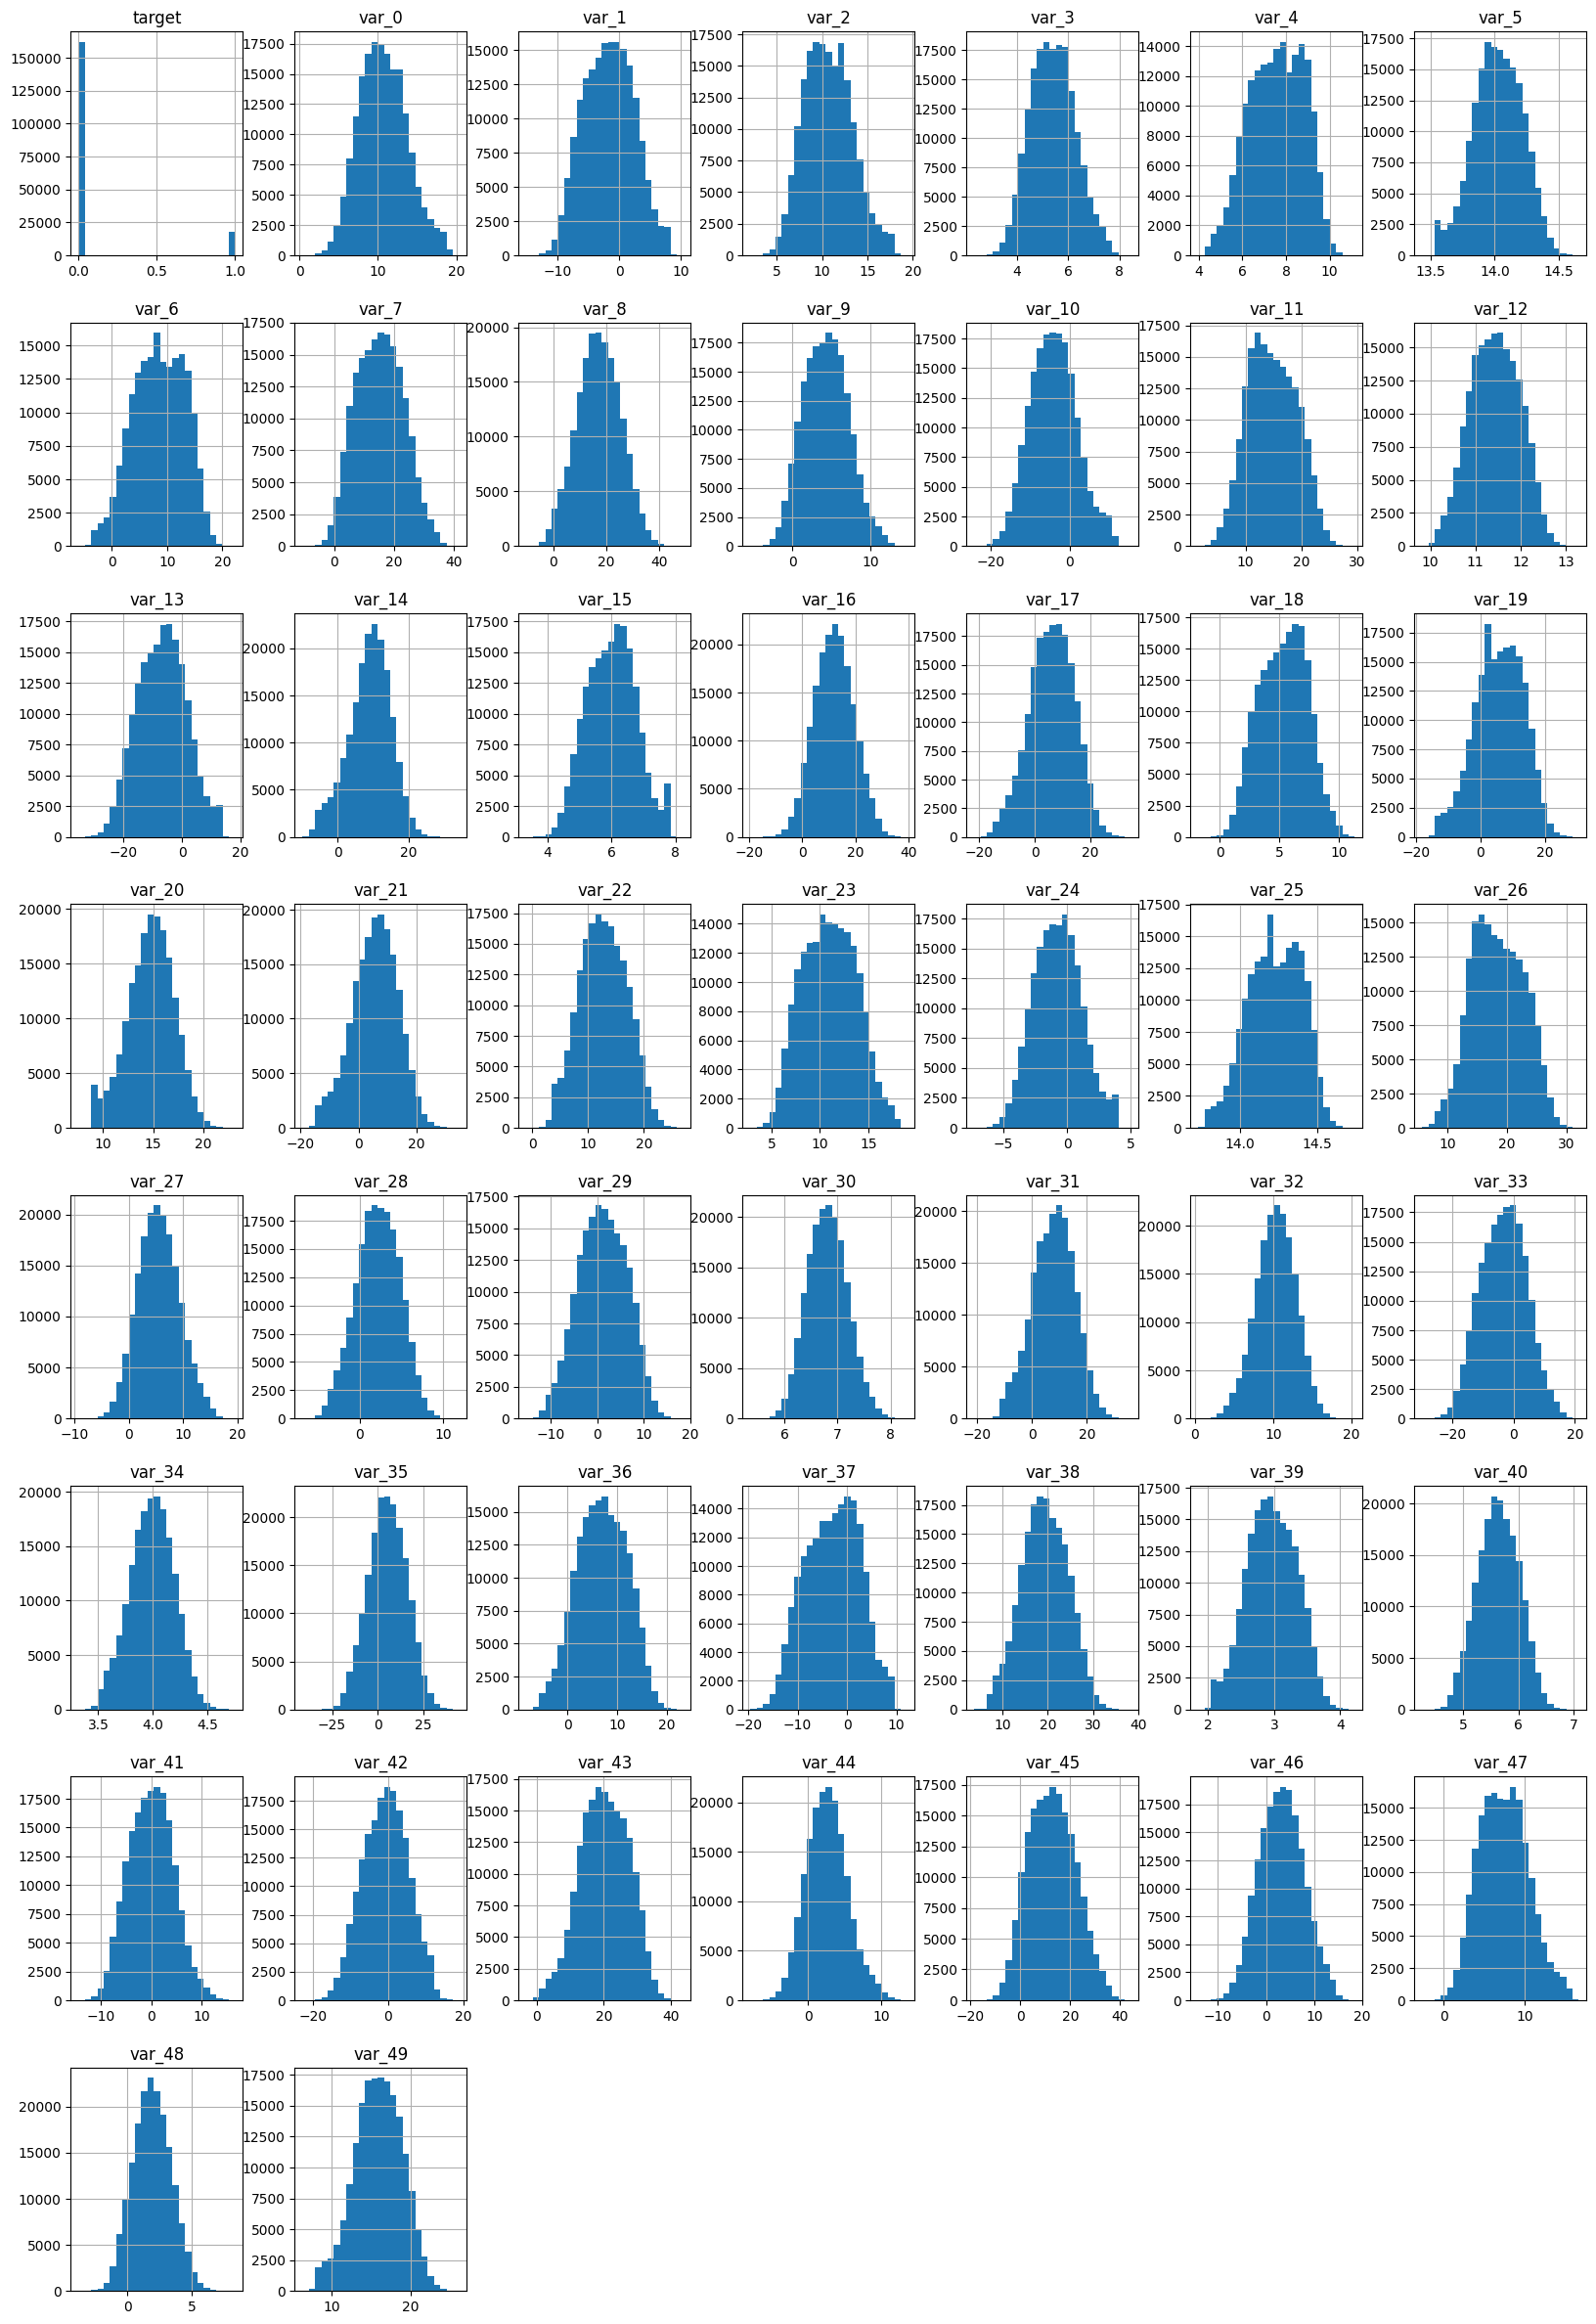

In [28]:
train.hist(bins = 25,figsize=(20, 30));


The target shows we have an unbalanced data set that could indicate skewed.

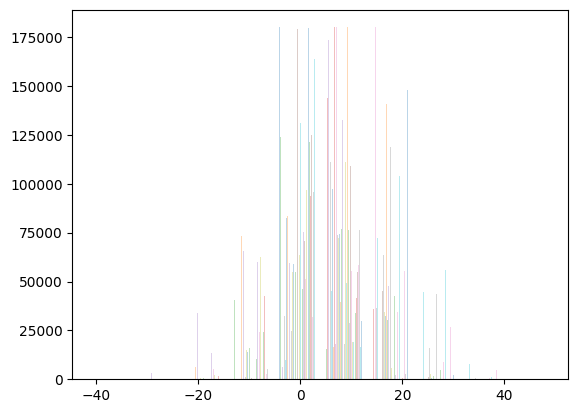

In [29]:
plt.hist(train, alpha=0.3, bins=10);

This histogram shows distribution of the varibles on one chart in addition to the plotted individual graphs

##Data Processing

###Gaussian Naive Bayes Model

In [30]:
gnb = GaussianNB()

In [31]:
y = train['target'].copy()
X = train.drop('target', axis=1, inplace=False)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 36000 points : 3283


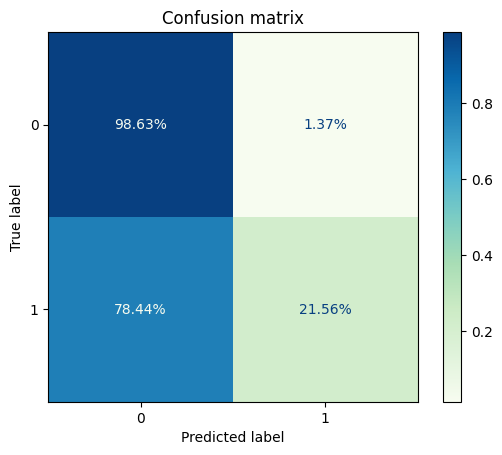

In [33]:
metrics.ConfusionMatrixDisplay.from_estimator(
    gnb,
    X_test,
    y_test,
    normalize = 'true',
    values_format = '.2%',
    cmap = 'GnBu',
    )
plt.grid(False)
plt.title('Confusion matrix') ;
plt.savefig('confusion_matrix.png')

###Cross Validation

Next, we'll perform cross validation to see what our average accuracy is. First we'll create a function for cross-validation.

In [34]:
def cross_validate(X, y, num_loops):
  """Randomly splits X and y values into train/test groups (test size = 20%).
  Creates a GaussianNB model.
  Returns a numpy array of accuracy scores for the tests.
  """

  accuracy_scores = np.zeros(num_loops)

  for i in range(num_loops):
    model_split_cv = GaussianNB()
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)
    model_split_cv.fit(X_train, y_train)
    y_split_pred = model_split_cv.predict(X_test)
    accuracy_scores[i] = metrics.accuracy_score(y_test, y_split_pred)

  return accuracy_scores

Then we'll run our function.

In [35]:
accuracy_scores = cross_validate(X, y, 100)
print(round(accuracy_scores.mean(), 5))

0.9113


##Data Visualization

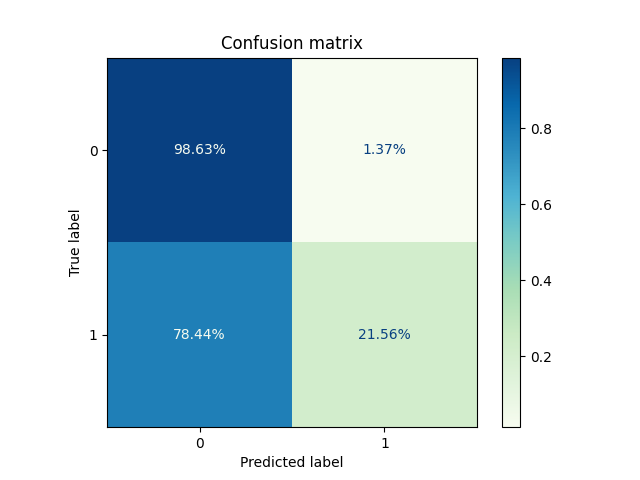

In [36]:
Image('confusion_matrix.png')

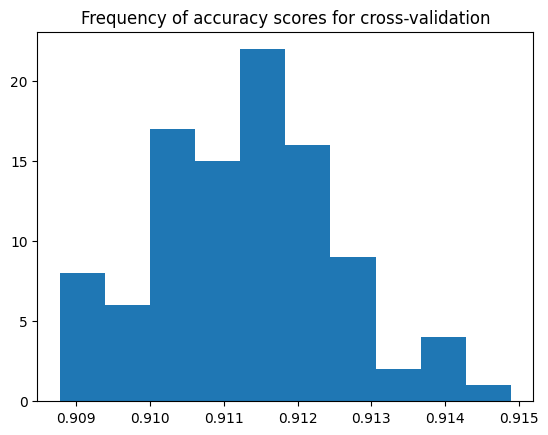

In [37]:
plt.hist(accuracy_scores)
plt.title('Frequency of accuracy scores for cross-validation')
plt.show()

##Balancing Data

In [38]:
train_balanced = train.groupby('target').sample(n = 18040)
train_balanced['target'].value_counts()

target
0    18040
1    18040
Name: count, dtype: int64

In [39]:
y = train_balanced['target'].copy()
X = train_balanced.drop('target', axis=1, inplace=False)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 7216 points : 1774


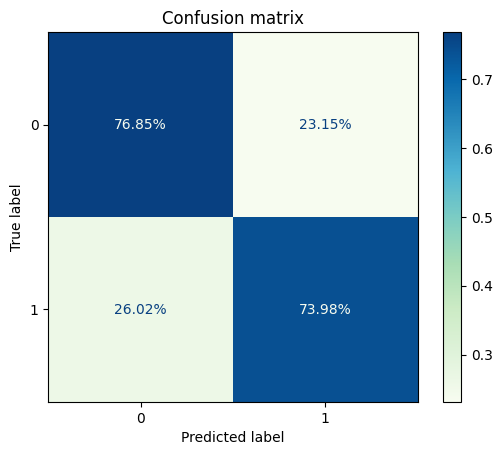

In [41]:
metrics.ConfusionMatrixDisplay.from_estimator(
    gnb,
    X_test,
    y_test,
    normalize = 'true',
    values_format = '.2%',
    cmap = 'GnBu',
    )
plt.grid(False)
plt.title('Confusion matrix') ;
plt.savefig('confusion_matrix.png')

In [42]:
def cross_validate(X, y, num_loops):
  """Randomly splits X and y values into train/test groups (test size = 20%).
  Creates a GaussianNB model.
  Returns a numpy array of accuracy scores for the tests.
  """

  accuracy_scores = np.zeros(num_loops)

  for i in range(num_loops):
    model_split_cv = GaussianNB()
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)
    model_split_cv.fit(X_train, y_train)
    y_split_pred = model_split_cv.predict(X_test)
    accuracy_scores[i] = metrics.accuracy_score(y_test, y_split_pred)

  return accuracy_scores

In [ ]:
accuracy_scores = cross_validate(X, y, 100)
print(round(accuracy_scores.mean(), 5))

## Conclusion

### Important features

We saw that the data we received is unbalanced and that there a some columns that need to be dropped in order to further run a model.

### Model performance

- Using Naive Bayes resulted in an average accuracy of 91% in our cross-validation tests.
- all of our features have a very low correlated with each other and the distribution is normal therefore meeting the requirements for using the Naive Bayes model.
- Our model did better at predicting with a balanced dataset and having an accuracy of 75%

### Future exploration/ Next steps

- It would be worth exploring alternative models like a random forest and possibly a decision tree. This still needs more exploring.  
